In [225]:
# Importing Libararies

import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from datetime import datetime

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

## Import Bike Dataset

In [123]:
bike_data_set=pd.read_csv("day.csv")
bike_data_set.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Pre-Processing 
1. season : season (1:spring, 2:summer, 3:fall, 4:winter)
2. weathersit:
        
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


In [124]:
#changing cnt (target Variable position to first)
bike_data_set.columns.values
new_positions=['cnt','instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered']
bike_data_set=bike_data_set[new_positions]

In [125]:
#convering season to Categorical variable
bike_data_set['season']=bike_data_set['season'].apply(lambda x: 'spring' if x==1 else 'summer' if x==2 else 'fall' if x==3 else 'winter')

#convering weathersit to Categorical variable

bike_data_set['weathersit']=bike_data_set['weathersit'].apply(lambda x: 'Clear' if x==1 else 'Mist' if x==2 else 'Light Snow' if x==3 else 'Heavy Rain')


In [126]:
bike_data_set.describe()

,cnt,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,4508.006849,365.500000,0.500000,6.526027,0.028767,2.997260,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534
std,1936.011647,210.877136,0.500343,3.450215,0.167266,2.006161,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728
min,22.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000
25%,3169.750000,183.250000,0.000000,4.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000
50%,4548.500000,365.500000,0.500000,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000
75%,5966.000000,547.750000,1.000000,10.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000
max,8714.000000,730.000000,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000


In [127]:
bike_data_set.info()
#CNT is our target variable hence we can do linear regression. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cnt         730 non-null    int64  
 1   instant     730 non-null    int64  
 2   dteday      730 non-null    object 
 3   season      730 non-null    object 
 4   yr          730 non-null    int64  
 5   mnth        730 non-null    int64  
 6   holiday     730 non-null    int64  
 7   weekday     730 non-null    int64  
 8   workingday  730 non-null    int64  
 9   weathersit  730 non-null    object 
 10  temp        730 non-null    float64
 11  atemp       730 non-null    float64
 12  hum         730 non-null    float64
 13  windspeed   730 non-null    float64
 14  casual      730 non-null    int64  
 15  registered  730 non-null    int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 91.4+ KB


In [128]:
bike_data_set.isnull().sum()
#no null in the data

cnt           0
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
dtype: int64

## Lets Visualize Data

<Figure size 1600x1000 with 0 Axes>

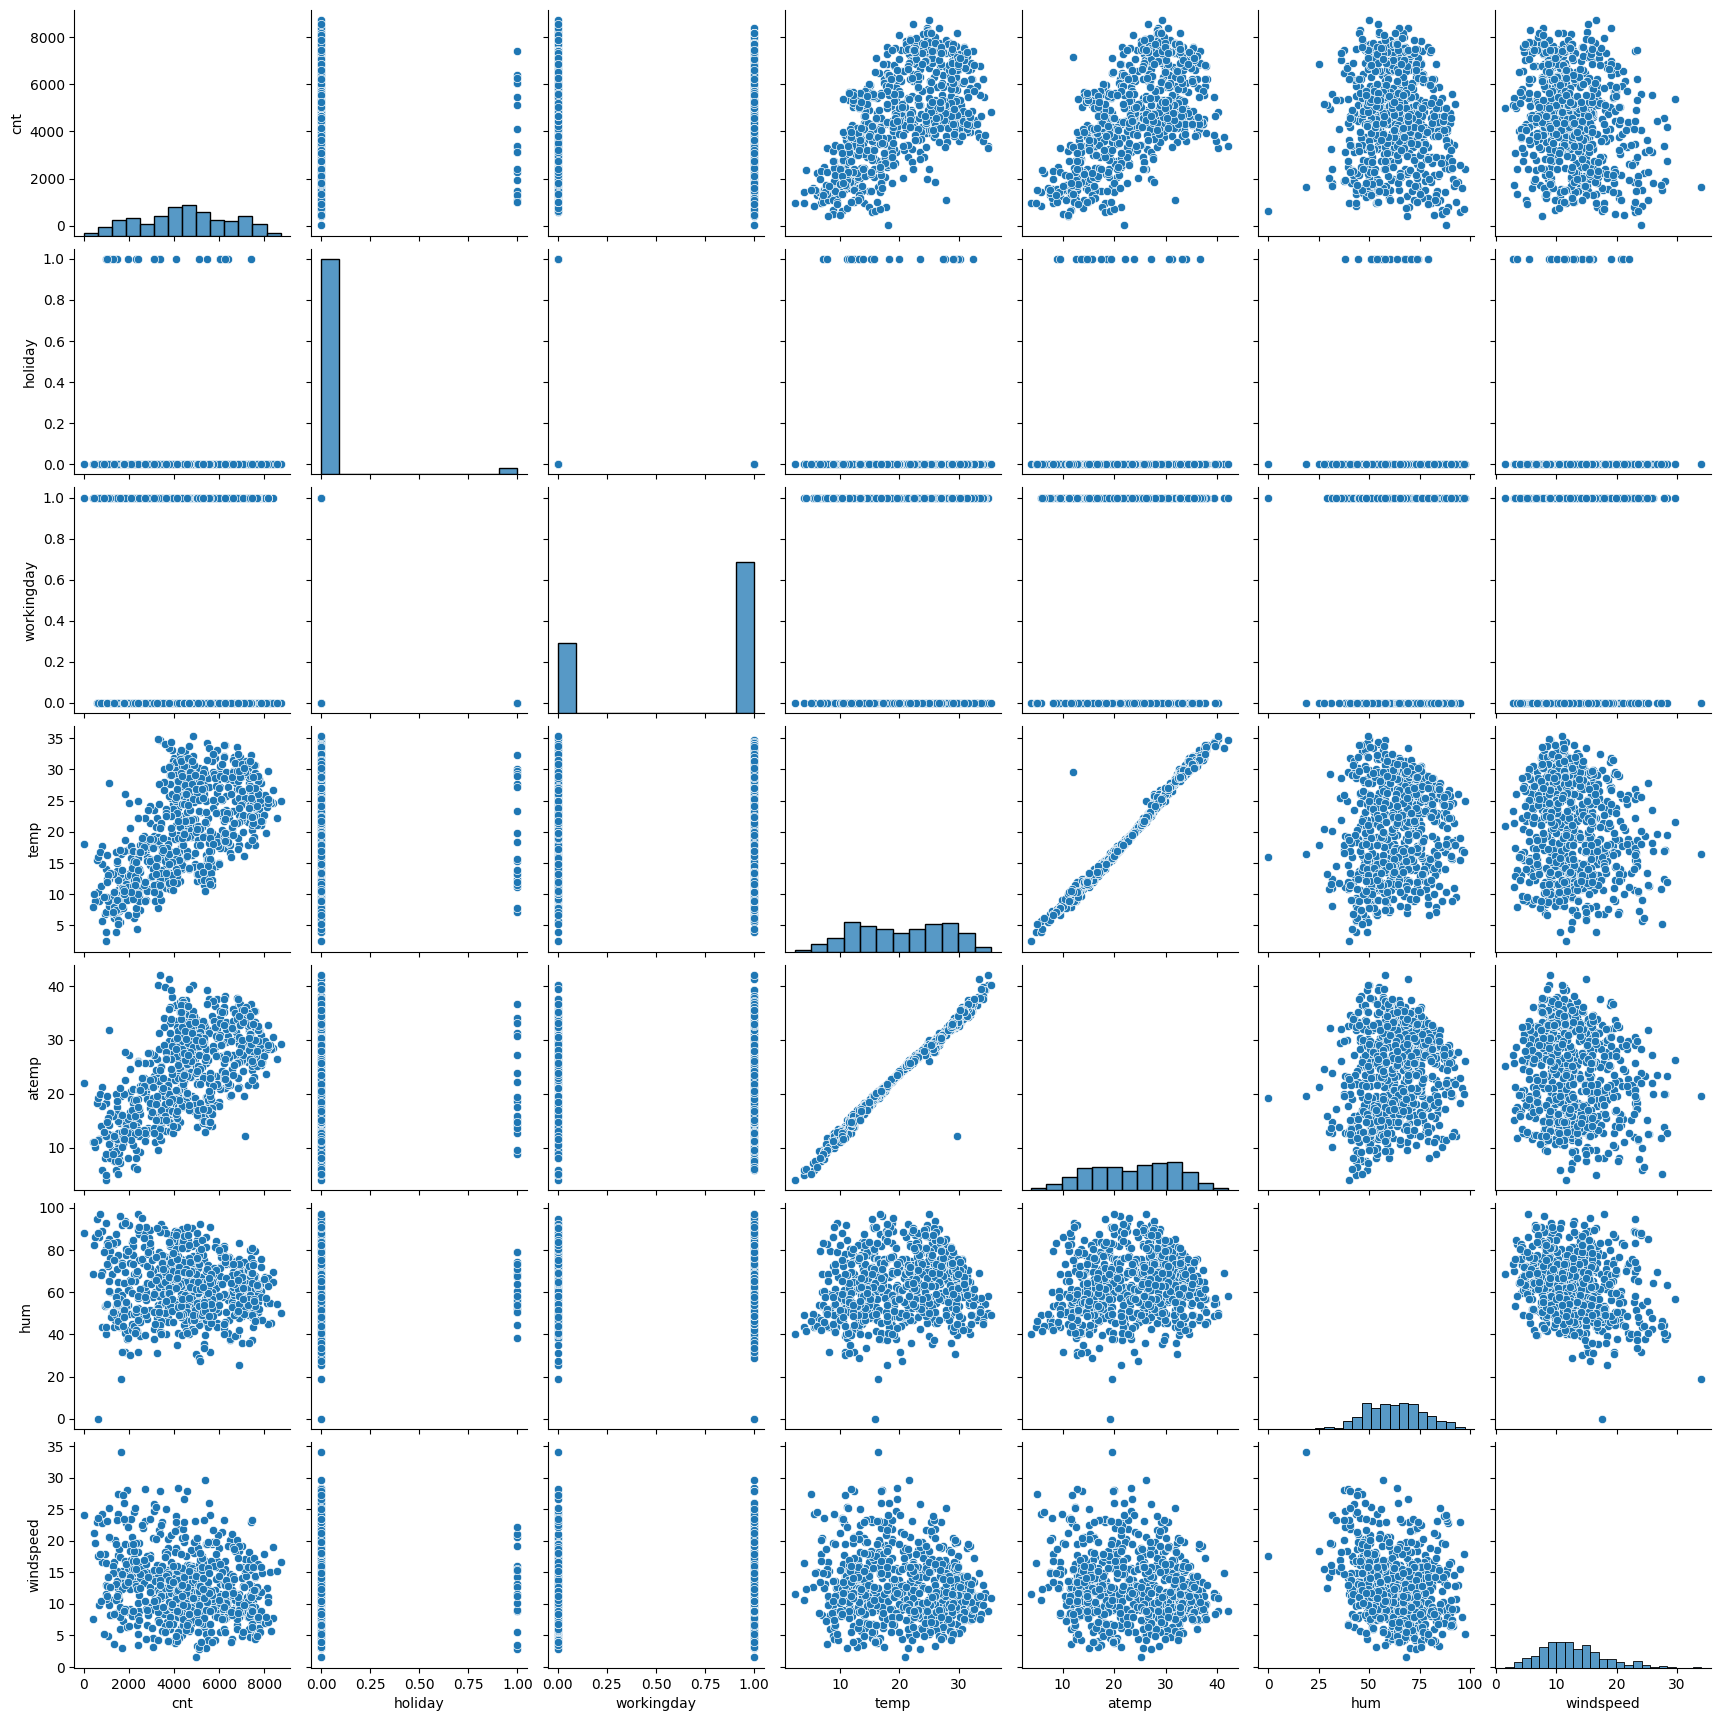

In [129]:
#lets create a pair plot for all numerical variables 
plt.figure(figsize=(16,10))
sns.pairplot(bike_data_set[['cnt','holiday','workingday','temp','atemp','hum','windspeed']])
plt.show()

from above charts , it seems like temp windspeed, atemp are strong predictor. and have some relationship 
we can go ahead with linear regression as there are few variables that are corelated with CNT


<Axes: xlabel='season', ylabel='cnt'>

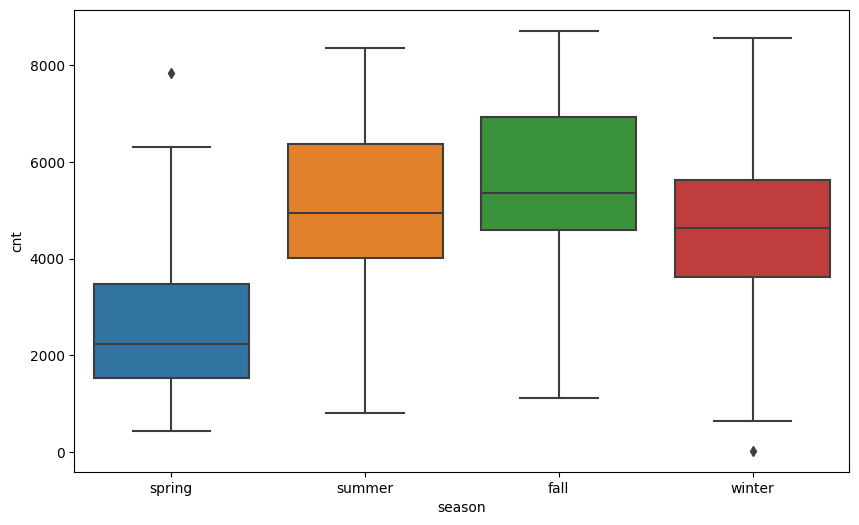

In [130]:
# Lets visualize Categorical variables, Create some box plot
plt.figure(figsize=(10,6))
sns.boxplot(x='season',y='cnt',data=bike_data_set)


<Axes: xlabel='weathersit', ylabel='cnt'>

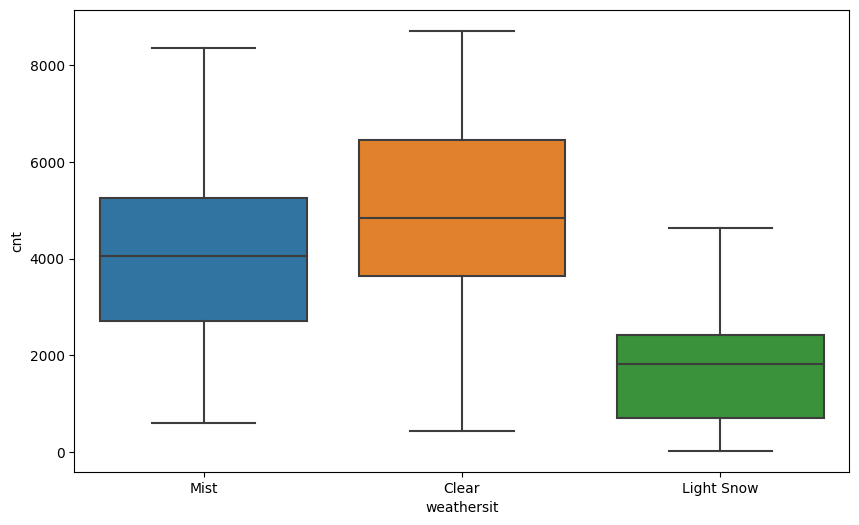

In [131]:
# Lets visualize Categorical variables, Create some box plot
plt.figure(figsize=(10,6))
sns.boxplot(x='weathersit',y='cnt',data=bike_data_set)


## Preparing the Data

    - Encoding 
        Converting Binary Variables to 1/0
        Other Categorical Variables to Dummy Variables 
    - Remove unwanted data    

In [132]:
#removing redudant variables
weathersit_frame=pd.get_dummies(bike_data_set['weathersit'],dtype=int,drop_first=True)

#concating dummy frame with main frame
bike_data_set=pd.concat([bike_data_set,weathersit_frame],axis=1)

#drop weathersit variable 
bike_data_set=bike_data_set.drop('weathersit',axis=1)



In [133]:
#removing redudant variables
bike_data_set['season'].value_counts()
season_frame=pd.get_dummies(bike_data_set['season'],dtype=int,drop_first=True)
#concating dummy frame with main frame
bike_data_set=pd.concat([bike_data_set,season_frame],axis=1)

#drop weathersit variable 
bike_data_set=bike_data_set.drop('season',axis=1)


In [134]:
#drop dteday and instant,

#casual and registerd. it will not be parameter

bike_data_set=bike_data_set.drop('dteday',axis=1)
bike_data_set=bike_data_set.drop('instant',axis=1)
bike_data_set=bike_data_set.drop('casual',axis=1)
bike_data_set=bike_data_set.drop('registered',axis=1)

In [135]:
bike_data_set.head()

,cnt,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,Light Snow,Mist,spring,summer,winter
0,985,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,0,1,1,0,0
1,801,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,0,1,1,0,0
2,1349,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,0,0,1,0,0
3,1562,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,0,0,1,0,0
4,1600,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,0,0,1,0,0


## Splitting the data into Train and Test

In [189]:
bike_train,bike_test=train_test_split(bike_data_set,train_size=0.7,random_state=100)
print(bike_train.shape)
print(bike_test.shape)

(510, 15)
(220, 15)


In [190]:
#Rescaling the features
scaler=MinMaxScaler()
list_of_columns_scaling=['weekday','mnth','temp','atemp','hum','windspeed','cnt']
bike_train[list_of_columns_scaling]=scaler.fit_transform(bike_train[list_of_columns_scaling])
bike_train.describe()

,cnt,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,Light Snow,Mist,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.513499,0.507843,0.503743,0.025490,0.498366,0.676471,0.537440,0.513156,0.650480,0.320883,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.224421,0.500429,0.315038,0.157763,0.336182,0.468282,0.225858,0.212410,0.145846,0.169803,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.356420,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.518638,1.000000,0.545455,0.000000,0.500000,1.000000,0.542596,0.529718,0.653714,0.296763,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.684710,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Training the Model

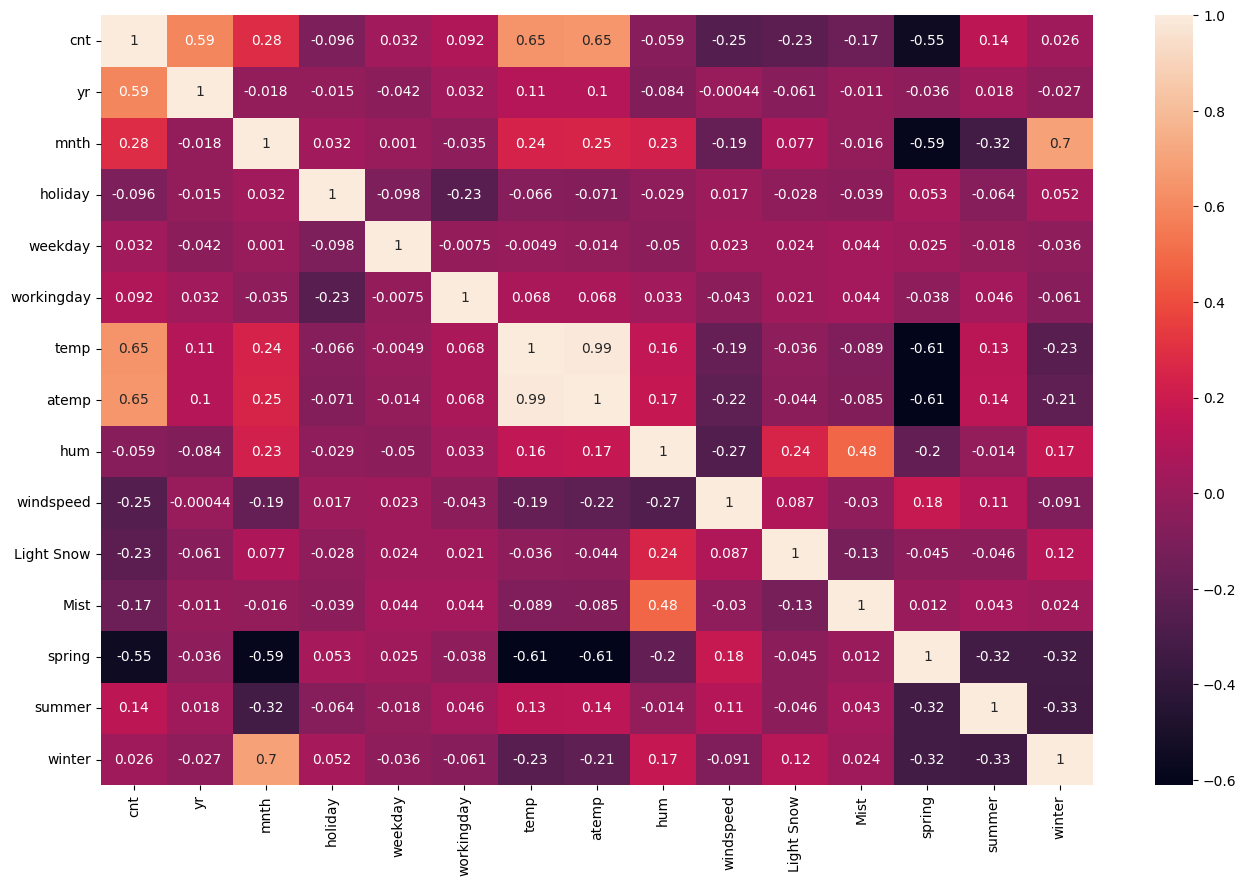

In [191]:
plt.figure(figsize=(16,10))
sns.heatmap(bike_train.corr(),annot=True)
plt.show()

In [192]:
#X_Train and yTrain
y_train=bike_train.pop('cnt')
X_train=bike_train


## Using Statsmodels API

In [193]:
#adding a constant
#using predict variable as temp as it has high corelation with CNT (target) variable
X_train_sm=sm.add_constant(X_train['temp'])

#creating first OLS model

l_model= sm.OLS(y_train,X_train_sm)

#fitting
lr_model=l_model.fit()

#params
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [194]:
#Model Summary
lr_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           2.46e-61
Time:                        14:11:13   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P value is 0, showing signigicance for yr, R Squared showed 41% of the variance

Will add another predict variable to imporve model performance. As per co-relation map , A-temp shows high corelation

In [195]:
#adding A-temp

#adding a constant
#using predict variable as temp as it has high corelation with CNT (target) variable
X_train_sm=sm.add_constant(X_train[['atemp']])

#creating first OLS model

l_model= sm.OLS(y_train,X_train_sm)

#fitting
lr_model=l_model.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     367.6
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           4.77e-62
Time:                        14:11:13   Log-Likelihood:                 177.73
No. Observations:                 510   AIC:                            -351.5
Df Residuals:                     508   BIC:                            -343.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1622      0.020      8.181      0.000       0.123       0.201
atemp          0.6846      0.036     19.173      0.000       0.614       0.755
==============================================================================
Omnibus:                        3.256   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                2.759
Skew:                           0.081   Prob(JB):                        0.252
Kurtosis:                       2.678   Cond. No.                         6.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
X_train.drop('temp',axis=1,inplace=True)

In [197]:
# Lets try with all columns and understand what we need

bike_data_set.columns
X_train_sm=sm.add_constant(X_train)

#creating first OLS model

l_model= sm.OLS(y_train,X_train_sm)

#fitting
lr_model=l_model.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.4
Date:                Thu, 21 Sep 2023   Prob (F-statistic):          2.60e-181
Time:                        14:11:13   Log-Likelihood:                 490.83
No. Observations:                 510   AIC:                            -953.7
Df Residuals:                     496   BIC:                            -894.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2569      0.039      6.655      0.000       0.181       0.333
yr             0.2335      0.008     27.654      0.000       0.217       0.250
mnth           0.0154      0.026      0.591      0.555      -0.036       0.066
holiday       -0.0605      0.027     -2.212      0.027      -0.114      -0.007
weekday        0.0504      0.013      4.013      0.000       0.026       0.075
workingday     0.0190      0.009      2.072      0.039       0.001       0.037
atemp          0.4916      0.035     13.959      0.000       0.422       0.561
hum           -0.1261      0.039     -3.209      0.001      -0.203      -0.049
windspeed     -0.1622      0.027     -6.062      0.000      -0.215      -0.110
Light Snow    -0.2435      0.028     -8.851      0.000      -0.298      -0.189
Mist          -0.0575      0.011     -5.248      0.000      -0.079      -0.036
spring        -0.0892      0.022     -3.989      0.000      -0.133      -0.045
summer         0.0340      0.015      2.244      0.025       0.004       0.064
winter         0.0646      0.018      3.626      0.000       0.030       0.100
==============================================================================
Omnibus:                       74.418   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.523
Skew:                          -0.727   Prob(JB):                     2.12e-43
Kurtosis:                       5.671   Cond. No.                         23.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#I have list of P significance, will get VIF and based on that i will choose what to drop


In [198]:
#calculate VIF for the columns. it will tell us how values are co-related to each other

vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
6,hum,29.86
5,atemp,16.29
1,mnth,12.44
7,windspeed,4.69
10,spring,4.23
12,winter,4.21
4,workingday,3.19
3,weekday,3.15
11,summer,2.57
9,Mist,2.31


#WILL REMOVE mnth PARAMETER AS IT p VALUE IS >0.5 

In [199]:
X=X_train.drop('mnth',axis=1)

#Recreate the model
# Lets try with all columns and understand what we need

bike_data_set.columns
X_train_sm=sm.add_constant(X)

#creating first OLS model

l_model= sm.OLS(y_train,X_train_sm)

#fitting
lr_model=l_model.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.1
Date:                Thu, 21 Sep 2023   Prob (F-statistic):          2.13e-182
Time:                        14:11:14   Log-Likelihood:                 490.65
No. Observations:                 510   AIC:                            -955.3
Df Residuals:                     497   BIC:                            -900.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2642      0.037      7.228      0.000       0.192       0.336
yr             0.2333      0.008     27.669      0.000       0.217       0.250
holiday       -0.0599      0.027     -2.193      0.029      -0.114      -0.006
weekday        0.0508      0.013      4.056      0.000       0.026       0.075
workingday     0.0189      0.009      2.062      0.040       0.001       0.037
atemp          0.4925      0.035     14.006      0.000       0.423       0.562
hum           -0.1239      0.039     -3.169      0.002      -0.201      -0.047
windspeed     -0.1619      0.027     -6.053      0.000      -0.214      -0.109
Light Snow    -0.2444      0.027     -8.904      0.000      -0.298      -0.191
Mist          -0.0579      0.011     -5.292      0.000      -0.079      -0.036
spring        -0.0954      0.020     -4.837      0.000      -0.134      -0.057
summer         0.0299      0.013      2.228      0.026       0.004       0.056
winter         0.0690      0.016      4.281      0.000       0.037       0.101
==============================================================================
Omnibus:                       74.941   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.719
Skew:                          -0.730   Prob(JB):                     7.06e-44
Kurtosis:                       5.687   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
#calculate VIF for the columns. it will tell us how values are co-related to each other

vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,hum,27.00
4,atemp,15.23
6,windspeed,4.56
9,spring,3.67
3,workingday,3.19
2,weekday,3.09
11,winter,2.90
8,Mist,2.28
10,summer,2.20
0,yr,2.07


In [201]:
# hum has highest VIF, will drop HUM and recreate model

X=X.drop('hum',axis=1)

#Recreate the model
# Lets try with all columns and understand what we need

bike_data_set.columns
X_train_sm=sm.add_constant(X)

#creating first OLS model

l_model= sm.OLS(y_train,X_train_sm)

#fitting
lr_model=l_model.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.7
Date:                Thu, 21 Sep 2023   Prob (F-statistic):          2.00e-181
Time:                        14:11:15   Log-Likelihood:                 485.55
No. Observations:                 510   AIC:                            -947.1
Df Residuals:                     498   BIC:                            -896.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1991      0.031      6.527      0.000       0.139       0.259
yr             0.2364      0.008     27.958      0.000       0.220       0.253
holiday       -0.0601      0.028     -2.182      0.030      -0.114      -0.006
weekday        0.0545      0.013      4.331      0.000       0.030       0.079
workingday     0.0193      0.009      2.085      0.038       0.001       0.037
atemp          0.4654      0.034     13.523      0.000       0.398       0.533
windspeed     -0.1380      0.026     -5.330      0.000      -0.189      -0.087
Light Snow    -0.2792      0.025    -10.994      0.000      -0.329      -0.229
Mist          -0.0781      0.009     -8.708      0.000      -0.096      -0.060
spring        -0.1016      0.020     -5.127      0.000      -0.141      -0.063
summer         0.0262      0.013      1.948      0.052      -0.000       0.053
winter         0.0589      0.016      3.696      0.000       0.028       0.090
==============================================================================
Omnibus:                       73.337   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.844
Skew:                          -0.730   Prob(JB):                     4.41e-41
Kurtosis:                       5.572   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [202]:
#calculate VIF for the columns. it will tell us how values are co-related to each other

vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
4,atemp,5.17
5,windspeed,4.54
3,workingday,3.15
2,weekday,3.08
8,spring,2.23
0,yr,2.06
9,summer,1.86
10,winter,1.73
7,Mist,1.55
1,holiday,1.09


In [203]:
# hum has highest VIF, will drop HUM and recreate model

X=X.drop('atemp',axis=1)

#Recreate the model
# Lets try with all columns and understand what we need

bike_data_set.columns
X_train_sm=sm.add_constant(X)

#creating first OLS model

l_model= sm.OLS(y_train,X_train_sm)

#fitting
lr_model=l_model.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.5
Date:                Thu, 21 Sep 2023   Prob (F-statistic):          7.12e-149
Time:                        14:11:15   Log-Likelihood:                 405.80
No. Observations:                 510   AIC:                            -789.6
Df Residuals:                     499   BIC:                            -743.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5568      0.018     31.388      0.000       0.522       0.592
yr             0.2478      0.010     25.222      0.000       0.229       0.267
holiday       -0.0682      0.032     -2.118      0.035      -0.131      -0.005
weekday        0.0503      0.015      3.426      0.001       0.021       0.079
workingday     0.0208      0.011      1.926      0.055      -0.000       0.042
windspeed     -0.1757      0.030     -5.844      0.000      -0.235      -0.117
Light Snow    -0.2947      0.030     -9.944      0.000      -0.353      -0.236
Mist          -0.0882      0.010     -8.445      0.000      -0.109      -0.068
spring        -0.3130      0.014    -22.011      0.000      -0.341      -0.285
summer        -0.0567      0.014     -4.045      0.000      -0.084      -0.029
winter        -0.0849      0.014     -6.117      0.000      -0.112      -0.058
==============================================================================
Omnibus:                       28.748   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.210
Skew:                          -0.324   Prob(JB):                     1.39e-13
Kurtosis:                       4.539   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [204]:
#calculate VIF for the columns. it will tell us how values are co-related to each other

vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
4,windspeed,3.96
2,weekday,2.64
3,workingday,2.61
7,spring,1.90
0,yr,1.86
8,summer,1.86
9,winter,1.70
6,Mist,1.54
5,Light Snow,1.08
1,holiday,1.07


## Residual Analysis

<Axes: ylabel='Density'>

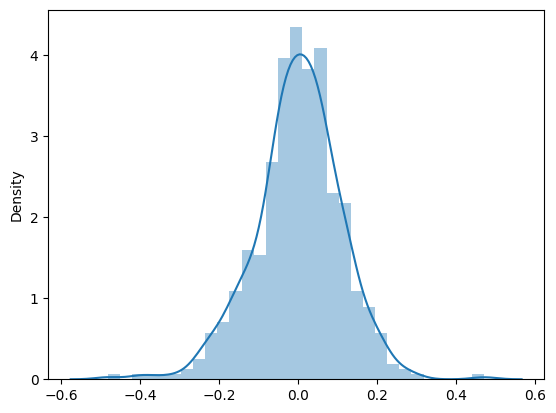

In [205]:
y_train_pred=lr_model.predict(X_train_sm)
res=y_train-y_train_pred
sns.distplot(res)

Cenetered near zero. should be good here 

## Prediction and Evaluation the model


bike_test[list_of_columns_scaling]=scaler.transform(bike_test[list_of_columns_scaling])
bike_test.head()

In [207]:
#y_test
y_test=bike_test.pop('cnt')
X_test=bike_test

In [211]:
X_test_sm=sm.add_constant(X_test)
X_test_sm=X_test_sm.drop(['temp','hum','mnth','temp'],axis=1)

# Predict the model

In [222]:
y_test_pred=lr_model.predict(X_test_sm)

In [226]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.745919950987289

## Overall R2 score is 74 % on unseen Test set which is also near to training set score 76%.